In [1]:
import os , shutil

In [2]:
#directory where original dataset is present
original_dataset_dir = 'C:/Users/Dell/Desktop/kaggle_original_data'

In [4]:
#making a folder named cats_and_dogs in E drive
base_dir = 'E:/cats_&_dogs'
os.mkdir(base_dir)

In [5]:
#making new folder named train in cats_and_dogs
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
#making new folder named validation in cats_and_dogs
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
#making new folder named test in cats_and_dogs
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [6]:
#directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
#directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

In [7]:
#directory with validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
#directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

In [8]:
#directory with test cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
#directory with test dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [9]:
#Copying cats images from kaggle_original_data directory to the cat's train, validation, test directories

In [10]:
#Copies the first 1,000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [11]:
#Copies the next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [12]:
#Copies the next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [13]:
#Copying dogs images from kaggle_original_data directory to the dog's train, validation, test directories

In [14]:
#Copies the first 1,000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [15]:
#Copies the next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [16]:
#Copies the next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [17]:
#count number of training, validation and test images of cats and dogs
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


# TRAINING

In [18]:
#Instantiating a small convnet for dogs vs. cats classification

In [19]:
from tensorflow.keras import layers
from tensorflow.keras import models
model = models.Sequential()
#####There are 32 filters, each 3x3x3 (i.e. 27 weights) plus 1 for the bias (i.e. total 28 weights each). 
#And 32 filters x 28 weights each = 896 Parameters.
#####here height and width of images that we gave is 150 but after every convolutional layer 2 pixels will pad(remove) from 
#heigth and 2 from width because we have not applied padding
#####here 32 means number of filters 3*3 is the size of each filter & in input image 150*150 is height and width of image 
#and 3 is dept(color channel here 3 bcz of RGB images)
#####input shape should be 4d array but here we are passing just 3 because 1st argument is of atch size which we are not 
#providing here and will provide shile fitting the data and thats why in utput shape we got first argument as None
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
#here we are applying another layer for pooling which is max pooling which will pick maximum value from the 
#filter(feature detector) and 2*2 is filter size
model.add(layers.MaxPooling2D((2, 2)))
#in 2nd convoltuional we use 64 filters
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
#here we convert all the immages from 3d t 1d
model.add(layers.Flatten())
######We usually add the Dense layer at the top of the Convolution layer to classify the images.However input data to the dense 
#layer 2D array of shape (dense layer takes 2 arguments(batch_size, units)). And the output of the convolution 
#layer is a 4D array. Thus we have to change the dimension of output received from convolution layer to a 2D array before 
#sending it to dense layer
######To add a Dense layer on top of CNN layer, we have to change the 4D output of CNN to 2D using keras Flatten layer.
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [21]:
#Configuring model for training
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

# DATA PREPROCESSING

In [22]:
#Using ImageDataGenerator to read images from directories

In [23]:
#datagenerator will read data in small batches
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Rescales all images by 1/255 so that all images are in range of 0 and 1 ( for normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
#here train_dir is targeted directory
    train_dir,
#Resizes all images to 150 × 150 beacuse con2d input size is also 150*150
    target_size=(150, 150),
#will pick first 20 images then other 20 then other 20 means it will pick data in batches
    batch_size=20,
#Because you use binary_crossentropy loss, you need binary labels so in class_mode we used binary.
    class_mode='binary')
#here validation_dir is targeted directory
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [24]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [25]:
# Fitting the model using a batch generator

In [26]:
history = model.fit_generator(
            train_generator,
            steps_per_epoch=100,
            epochs=30,
            validation_data=validation_generator,
            validation_steps=50)

Epoch 1/30
100/100 [==============================] - 291s 3s/step - loss: 0.6907 - acc: 0.5250 - val_loss: 0.6707 - val_acc: 0.6000
Epoch 2/30
100/100 [==============================] - 238s 2s/step - loss: 0.6587 - acc: 0.6180 - val_loss: 0.6553 - val_acc: 0.5950
Epoch 3/30
100/100 [==============================] - 234s 2s/step - loss: 0.6166 - acc: 0.6660 - val_loss: 0.6804 - val_acc: 0.5840
Epoch 4/30
100/100 [==============================] - 249s 2s/step - loss: 0.5765 - acc: 0.6995 - val_loss: 0.6256 - val_acc: 0.6570
Epoch 5/30
100/100 [==============================] - 236s 2s/step - loss: 0.5351 - acc: 0.7395 - val_loss: 0.5811 - val_acc: 0.6890
Epoch 6/30
100/100 [==============================] - 219s 2s/step - loss: 0.5042 - acc: 0.7490 - val_loss: 0.6022 - val_acc: 0.6770
Epoch 7/30
100/100 [==============================] - 223s 2s/step - loss: 0.4735 - acc: 0.7685 - val_loss: 0.5506 - val_acc: 0.6990
Epoch 8/30
100/100 [==============================] - 251s 3s/step - 

In [27]:
# Saving the model

In [28]:
model.save('cats_and_dogs_small_1.h5')

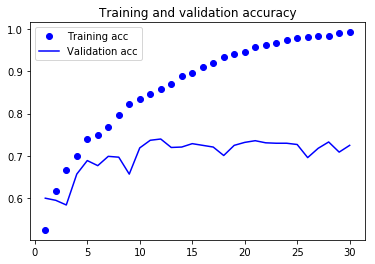

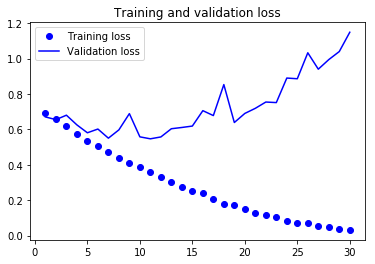

In [30]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [31]:
#####from the graphs we can see that the model is overfitted.
#####Overfitting is caused by having too few samples to learn from, rendering you unable to train a model that can generalize 
#to new data.

In [32]:
#####Data augmentation takes the approach of generating more training data from existing training samples, by augmenting the 
#samples via a number of random transformations that yield believable-looking images. The goal is that at training time,
#your model will never see the exact same picture twice.

In [33]:
#Setting up a data augmentation configuration via ImageDataGenerator

In [34]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [35]:
# Displaying some randomly augmented training images

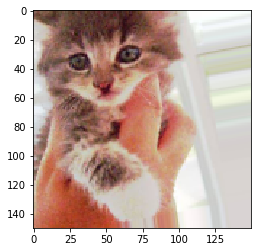

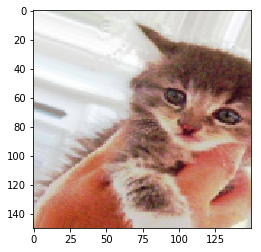

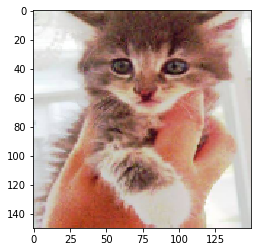

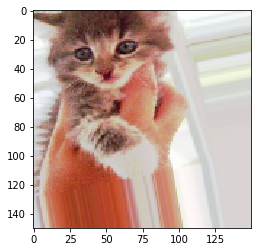

In [36]:
from tensorflow.keras.preprocessing import image
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [37]:
#####this may not be enough to completely get rid of overfitting. To further fight overfitting, you’ll also add a Dropout layer 
# to your model, right before the densely connected classifier.

In [38]:
# Defining a new convnet that includes dropout

In [39]:
#Dropout is a regularization technique for reducing overfitting in neural networks
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

In [40]:
# Training the convnet using data-augmentation generators

In [41]:
#now we have added some augmented data parameters in train images data generator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,)
#Note that the validation data shouldn’t be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [42]:
#fitting the model
history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=100,
        validation_data=validation_generator,
        validation_steps=50)

Epoch 1/100
100/100 [==============================] - 298s 3s/step - loss: 0.6940 - acc: 0.5180 - val_loss: 0.6814 - val_acc: 0.5666
Epoch 2/100
100/100 [==============================] - 348s 3s/step - loss: 0.6810 - acc: 0.5688 - val_loss: 0.6823 - val_acc: 0.5044
Epoch 3/100
100/100 [==============================] - 322s 3s/step - loss: 0.6639 - acc: 0.5966 - val_loss: 0.6333 - val_acc: 0.6250
Epoch 4/100
100/100 [==============================] - 334s 3s/step - loss: 0.6478 - acc: 0.6096 - val_loss: 0.6231 - val_acc: 0.6320
Epoch 5/100
100/100 [==============================] - 303s 3s/step - loss: 0.6366 - acc: 0.6389 - val_loss: 0.6017 - val_acc: 0.6605
Epoch 6/100
100/100 [==============================] - 302s 3s/step - loss: 0.6216 - acc: 0.6506 - val_loss: 0.5904 - val_acc: 0.6694
Epoch 7/100
100/100 [==============================] - 266s 3s/step - loss: 0.6101 - acc: 0.6608 - val_loss: 0.5659 - val_acc: 0.6808
Epoch 8/100
100/100 [==============================] - 263s 3s

Epoch 62/100
100/100 [==============================] - 328s 3s/step - loss: 0.4053 - acc: 0.8182 - val_loss: 0.4515 - val_acc: 0.8115
Epoch 63/100
100/100 [==============================] - 305s 3s/step - loss: 0.4046 - acc: 0.8138 - val_loss: 0.4118 - val_acc: 0.8236
Epoch 64/100
100/100 [==============================] - 287s 3s/step - loss: 0.4114 - acc: 0.8119 - val_loss: 0.4433 - val_acc: 0.8039
Epoch 65/100
100/100 [==============================] - 280s 3s/step - loss: 0.4031 - acc: 0.8150 - val_loss: 0.4752 - val_acc: 0.7766
Epoch 66/100
100/100 [==============================] - 291s 3s/step - loss: 0.3928 - acc: 0.8169 - val_loss: 0.5399 - val_acc: 0.7874
Epoch 67/100
100/100 [==============================] - 267s 3s/step - loss: 0.4016 - acc: 0.8217 - val_loss: 0.4321 - val_acc: 0.8160
Epoch 68/100
100/100 [==============================] - 282s 3s/step - loss: 0.3877 - acc: 0.8289 - val_loss: 0.4483 - val_acc: 0.8014
Epoch 69/100
100/100 [==============================] -

In [43]:
model.save('cats_and_dogs_small_2.h5')

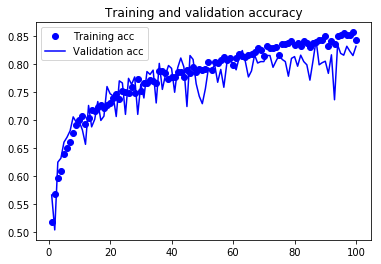

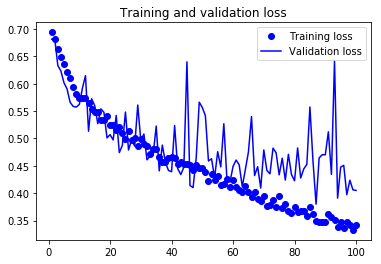

In [44]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# TESTING

Cat


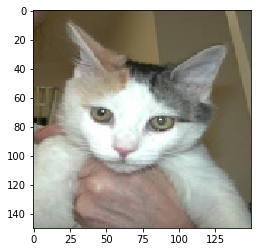

In [173]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
img = load_img('E:/cats_&_dogs/test/dogs/cat.1513.jpg', target_size=(150, 150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 150, 150 , 3)
img = img.astype('float32')
result = model.predict(img)
if(result==1):
    print('Dog')
else:
    print("Cat")
plt.show()

In [ ]:
#the picture in above given directory is of cat which is in dog folder and model predicted it correctly

Dog


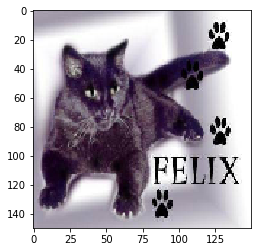

In [172]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
img = load_img('E:/cats_&_dogs/test/dogs/cat.1501.jpg', target_size=(150, 150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 150, 150 , 3)
img = img.astype('float32')
result = model.predict(img)
if(result==1):
    print('Dog')
else:
    print("Cat")
plt.show()

In [94]:
#although the picture of above image is of cat which is in test dog folder but model predicted it as dog so we can say it 
is not 100% accurate model

Dog


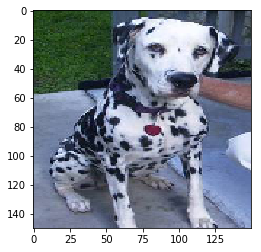

In [171]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
img = load_img('E:/cats_&_dogs/test/dogs/dog.1511.jpg', target_size=(150, 150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 150, 150 , 3)
img = img.astype('float32')
result = model.predict(img)
if(result==1):
    print('Dog')
else:
    print("Cat")
plt.show()

In [ ]:
#in above block correct prediction

Dog


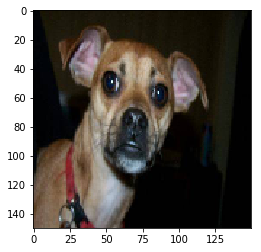

In [170]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
img = load_img('E:/cats_&_dogs/test/dogs/dog.1540.jpg', target_size=(150, 150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 150, 150 , 3)
img = img.astype('float32')
result = model.predict(img)
if(result==1):
    print('Dog')
else:
    print("Cat")
plt.show()

In [ ]:
#in above block correct prediction

Dog


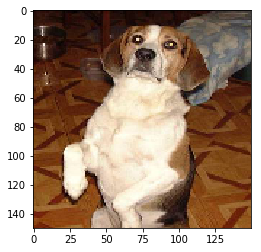

In [169]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
img = load_img('E:/cats_&_dogs/test/dogs/dog.1617.jpg', target_size=(150, 150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 150, 150 , 3)
img = img.astype('float32')
result = model.predict(img)
if(result==1):
    print('Dog')
else:
    print("Cat")
plt.show()

In [ ]:
#in above block correct prediction

Dog


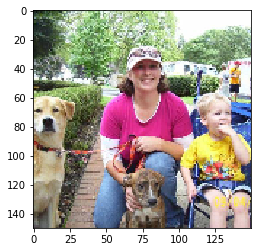

In [168]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
img = load_img('E:/cats_&_dogs/test/dogs/dog.1560.jpg', target_size=(150, 150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 150, 150 , 3)
img = img.astype('float32')
result = model.predict(img)
if(result==1):
    print('Dog')
else:
    print("Cat")
plt.show()

In [ ]:
#in above block correct prediction

Dog


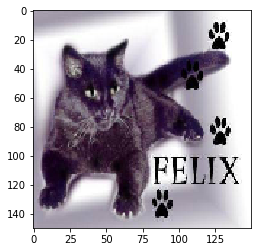

In [167]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
img = load_img('E:/cats_&_dogs/test/cats/cat.1501.jpg', target_size=(150, 150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 150, 150 , 3)
img = img.astype('float32')
result = model.predict(img)
if(result==1):
    print('Dog')
else:
    print("Cat")
plt.show()

In [100]:
#here in above block again the image is classified as dog but it is actually an image of cat

Dog


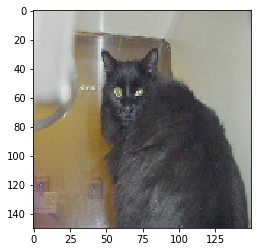

In [166]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
img = load_img('E:/cats_&_dogs/test/cats/cat.1525.jpg', target_size=(150, 150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 150, 150 , 3)
img = img.astype('float32')
result = model.predict(img)
if(result==1):
    print('Dog')
else:
    print("Cat")
plt.show()

In [102]:
#in above block again the image is of cat and it recognized it as dog

Dog


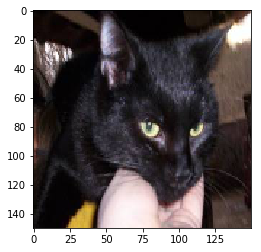

In [165]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
img = load_img('E:/cats_&_dogs/test/cats/cat.1534.jpg', target_size=(150, 150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 150, 150 , 3)
img = img.astype('float32')
result = model.predict(img)
if(result[0][0]==1):
    print('Dog')
else:
    print("Cat")
plt.show()

In [ ]:
#in above block again wrong prediction

Cat


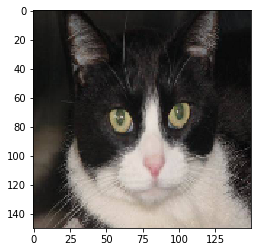

In [164]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
img = load_img('E:/cats_&_dogs/test/cats/cat.1535.jpg', target_size=(150, 150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 150, 150 , 3)
img = img.astype('float32')
result = model.predict(img)
if(result==1):
    print('Dog')
else:
    print("Cat")

In [ ]:
#correct prediction in above block

Dog


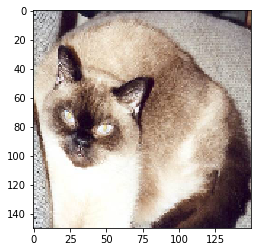

In [174]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
img = load_img('E:/cats_&_dogs/test/cats/cat.1516.jpg', target_size=(150, 150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 150, 150 , 3)
img = img.astype('float32')
result = model.predict(img)
if(result==1):
    print('Dog')
else:
    print("Cat")

In [175]:
#wrong prediction in above block

Dog


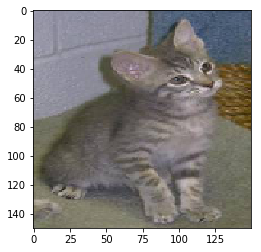

In [176]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
img = load_img('E:/cats_&_dogs/test/cats/cat.1541.jpg', target_size=(150, 150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 150, 150 , 3)
img = img.astype('float32')
result = model.predict(img)
if(result==1):
    print('Dog')
else:
    print("Cat")

In [177]:
#wrong prediction in above block

Dog


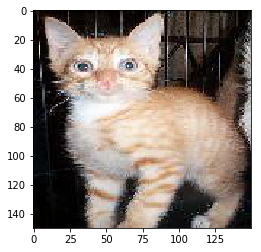

In [179]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
img = load_img('E:/cats_&_dogs/test/cats/cat.1549.jpg', target_size=(150, 150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 150, 150 , 3)
img = img.astype('float32')
result = model.predict(img)
if(result==1):
    print('Dog')
else:
    print('Cat')

In [ ]:
#wrong prediction in above block

Cat


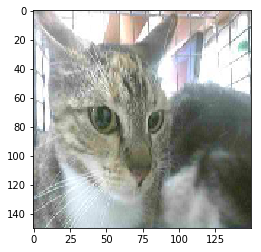

In [180]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
img = load_img('E:/cats_&_dogs/test/cats/cat.1545.jpg', target_size=(150, 150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 150, 150 , 3)
img = img.astype('float32')
result = model.predict(img)
if(result==1):
    print('Dog')
else:
    print("Cat")

In [181]:
#correct prediction in above block

Dog


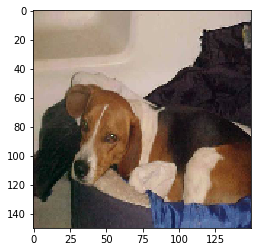

In [182]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
img = load_img('E:/cats_&_dogs/test/cats/dog.1534.jpg', target_size=(150, 150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 150, 150 , 3)
img = img.astype('float32')
result = model.predict(img)
if(result==1):
    print('Dog')
else:
    print("Cat")

In [183]:
#correct prediction in above block

Dog


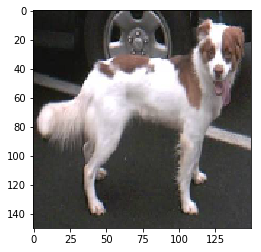

In [184]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
img = load_img('E:/cats_&_dogs/test/cats/dog.1500.jpg', target_size=(150, 150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 150, 150 , 3)
img = img.astype('float32')
result = model.predict(img)
if(result==1):
    print('Dog')
else:
    print("Cat")

In [185]:
#correct prediction in above block